# Wine Quality Analysis 

# On the data set

For more information, read [Cortez et al., 2009].

## Input variables (based on physicochemical tests):
1. Fixed acidity: acids are major wine properties and contribute greatly to a wine’s taste. Usually, the total acidity is divided into two groups: the volatile acids and the non-volatile or fixed acids. Fixed acids found in wine include: tartaric, malic, citric, and succinic. This variable is expressed in g(tartaricacid)/dm3 in the datasets.
2. Volatile acidity: essentially the process of wine turning into vinegar. In the U.S, the legal limits of Volatile Acidity are 1.2 g/L for red table wine and 1.1 g/L for white table wine. In these datasets, the volatile acidity is expressed in g(aceticacid)/dm3.
3. Citric acid is one of the fixed acids that you’ll find in wines. It’s expressed in g/dm3 in the two data sets.
4. Residual sugar typically refers to the sugar remaining after fermentation stops. It’s expressed in g/dm3 in the datasets.
5. Chlorides can be a significant contributor to saltiness in wine. Here, it’s expressed in g(sodiumchloride)/dm3.
6. Free sulfur dioxide: free sulfur dioxide becomes "bound" when it protects against oxidation and spoilage in wine, but remains permanently present afterward. Winemakers try to have the highest proportion of free sulfur to bind. This variable is expressed in mg/dm3 in the data.
7. Total sulfur dioxide is the sum of the bound and the free sulfur dioxide (SO2). Here, it’s expressed in mg/dm3. There are legal limits for sulfur levels in wines: in the EU, red wines can only have 160mg/L, while white and rose wines can have about 210mg/L. Sweet wines are allowed to have 400mg/L. Legal limits are set at 350mg/L for the USA, and 250mg/L for Australia.
8. Density is generally used as a measure of the conversion of sugar to alcohol (sugar concentration). Here, it’s expressed in g/cm3.
9. pH or the potential of hydrogen is a numeric scale to specify the acidity or basicity the wine. As you might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.
10. Sulphates are an additive that contribute to the sulfur dioxide levels. In this case, they are expressed in g(potassiumsulphate)/dm3.
11. Alcohol: wine is an alcoholic beverage and, as you know, the percentage of alcohol can vary from wine to wine. It’s expressed in % vol.

| Variable Name        | Role    | Type        | Description                                                                                               | Units   | Missing Values |
| -------------------- | ------- | ----------- | --------------------------------------------------------------------------------------------------------- | ------- | -------------- |
| fixed_acidity        | Feature | Continuous  | tartaric, malic, citric, and succinic; this variable is expressed in g(tartaricacid)/dm3 | g/dm^3  | no             |
| volatile_acidity     | Feature | Continuous  |                                                                                                           | g/dm^3  | no             |
| citric_acid          | Feature | Continuous  |                                                                                                           | g/dm^3  | no             |
| residual_sugar       | Feature | Continuous  |                                                                                                           | g/dm^3  | no             |
| chlorides            | Feature | Continuous  |                                                                                                           | g/dm^3  | no             |
| free_sulfur_dioxide  | Feature | Continuous  |                                                                                                           | mg/dm^3 | no             |
| total_sulfur_dioxide | Feature | Continuous  |                                                                                                           | mg/dm^3 | no             |
| density              | Feature | Continuous  |                                                                                                           | g/cm^3  | no             |
| pH                   | Feature | Continuous  |                                                                                                           | -       | no             |
| sulphates            | Feature | Continuous  |                                                                                                           | g/dm^3  | no             |
| alcohol              | Feature | Continuous  |                                                                                                           | vol.%   | no             |
| quality              | Target  | Integer     | score between 0 and 10                                                                                    | -       | no             |
| color                | Other   | Categorical | red or white                                                                                              | -       | no             |

## Output variable (based on sensory data): 

Quality: wine experts graded the wine quality between 0 (very bad) and 10 (excellent). The final score is the mean of at least three evaluations. Some analysts might combine these levels to Low, Medium & High-Quality wines.


Comments on output: quality

Average of at least 3 wine experts tasting

As a quality measure this might vary a lot!

Say: "Wine experts prefer ..."

Questions to ask: 
- Are there any similarities among the wines that were rated with a low, medium, high quality?

## Taste and physiochemical components

- Mit einem geringen pH-Wert zwischen 2,8 und 3,2 pH schmecken Weine stark säurebetont, mit 3,2 bis 3,5 säurefrisch, anregend und mit einem höheren pH-Wert von 3,2 bis 4 fad, flach und müde. 
- Die meisten der zahlreichen durch die chemische Analyse ermittelten Spurenelemente haben für das Geschmacksbild des Weines kaum Bedeutung. 
- Als Nebenprodukt der Gärung kann Essigsäure (flüchtige säure) ab einem bestimmten Umfang zu Beeinträchtigung der Weinqualität führen. 
- Die Dichte eines Weins bezieht sich auf seine Konsistenz und Viskosität. Ein dichter Wein hat eine höhere Konzentration von Feststoffen, wie beispielsweise Tanninen und Zuckern, und fühlt sich im Mund schwerer und dicker an. Die Dichte spielt eine wichtige Rolle für die Struktur, das Mundgefühl und die Aromen eines Weins. Die Dichte beeinflusst maßgeblich die Struktur eines Weins. Ein dichter Wein hat in der Regel eine stärkere und kräftigere Struktur. Die Tannine und andere Bestandteile sind reichhaltiger vorhanden und sorgen für eine längere Reifungsfähigkeit. Die Struktur eines Weins ist entscheidend für seine Komplexität und Lagerfähigkeit.

## Missing data
- input
  - origin
  - grape family
- Moschd
  - sugar before fermentation (Natural and added)
- Physio chemical
  - residual sugar composition (glucose vs fructose)
  - acids: tartaric vs malic, to estimate taste
  - tannin
  - higher alcohols, excpecially glycerin
  - lactic acid: what about that? 
- Smell

# Some values for data analysis: Legal Limits

In [798]:
quantities = ['volatile_acidity', 'total_sulfur_dioxide']
countries = ['US', 'EU', 'AUS']

legal_limits = pd.DataFrame(index=pd.MultiIndex.from_product([quantities, wine_color.categories, countries]), columns=['limit', 'limit_type'])

# U.S, the legal limits of Volatile Acidity
legal_limits.loc[('volatile_acidity', 'white', 'US'),:] = [1.1, 'upper']
legal_limits.loc[('volatile_acidity', 'red', 'US'),:] = [1.2, 'upper']

# in the EU, red wines can only have 160mg/L, 
# while white and rose wines can have about 210mg/L. 
# Sweet wines are allowed to have 400mg/L. 
# Legal limits are set at 350mg/L for the USA, 
# and 250mg/L for Australia.
legal_limits.loc[('total_sulfur_dioxide', 'white', 'EU'),:] = 210
legal_limits.loc[('total_sulfur_dioxide', 'red', 'EU'),:] = 160
legal_limits.loc[('total_sulfur_dioxide', 'white', 'US'),:] = 350
legal_limits.loc[('total_sulfur_dioxide', 'red', 'US'),:] = 350
legal_limits.loc[('total_sulfur_dioxide', 'white', 'EU'),:] = 250
legal_limits.loc[('total_sulfur_dioxide', 'red', 'EU'),:] = 250

legal_limits


C:\Users\olive\AppData\Local\Temp\ipykernel_25500\303674190.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  legal_limits.loc[('volatile_acidity', 'white', 'US'),:] = [1.1, 'upper']
C:\Users\olive\AppData\Local\Temp\ipykernel_25500\303674190.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  legal_limits.loc[('volatile_acidity', 'red', 'US'),:] = [1.2, 'upper']
C:\Users\olive\AppData\Local\Temp\ipykernel_25500\303674190.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  legal_limits.loc[('total_sulfur_dioxide', 'white', 'EU'),:] = 210
C:\Users\olive\AppData\Local\Temp\ipykernel_25500\303674190.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  legal_limits.loc[('total_sulfur_dioxide', 'red', 'EU'),:] = 160
C:\Users\olive\AppData\Local\Temp\ipykernel_25500\303674190.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  legal_limits.loc[('tota

limit limit_type
volatile_acidity     red   US    1.2      upper
                           EU    NaN        NaN
                           AUS   NaN        NaN
                     white US    1.1      upper
                           EU    NaN        NaN
                           AUS   NaN        NaN
total_sulfur_dioxide red   US    350        350
                           EU    250        250
                           AUS   NaN        NaN
                     white US    350        350
                           EU    250        250
                           AUS   NaN        NaN

# Modeling 

Components and Processes
- Tasters 
  - tasting / expectation machine
    - have a taste profile
    - rate good if taste profile is met
  - categorization / normalization machines: wine taste (physio chemical composition) -> quality
  - group with a wide variety somewhere between tradition and modernity
    - a lot of expectation what a good wine is, because the taste is very complex
    - work like well oiled machines: the person has tasted many wines and has found his taste profile
    - might be open to new tastes and surprises
  - What is quality? What is considered a good vinho verde? Are there certain quality characteristics to it? How strongly does the wine vary?
- Wine
  - taste profile that arises from physio-chemical composition
  - physio-chemical composition is very complex and we know only a few values
  - wine is created by fermentation of grapes
    - yeast turns sugar into alcohol and ???
    - a lot of other processes take place
    - additives: sugar, sulphates


Thoughts on Do's and Don't's if you want to find out what makes a good wine:
- find the values that primarily determine wine quality 
- filter out noise to get to conclusions about wine quality
- Abstraction

# Config Notebook

In [851]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from scipy import stats 
import pingouin as pg

# import pyarrow as pa

In [800]:
# config packages
pd.options.mode.copy_on_write = "warn"

In [801]:
# load project config
with open("../config/config.yaml", "r") as file:
    config = yaml.safe_load(file)
config

{'data_path_wine_red': 'data/wine+quality/winequality-red.csv',
 'data_path_wine_white': 'data/wine+quality/winequality-white.csv'}

# Import and build data frame

In [802]:
# NOTE - Keep two data frames if data is actually separate
# TODO - how to build paths in python 
# wine_r = pd.read_csv('data//wine+quality//winequality-red.csv', sep=';', dtype_backend=) # pyarrow enhanced data frame
wine_r = pd.read_csv('../' + config['data_path_wine_red'], sep=';')
wine_w = pd.read_csv('../' + config['data_path_wine_white'], sep=';')

In [803]:
# setting color as categorical data
wine_color = pd.CategoricalDtype(
    ["red", "white"], ordered=False
)
# wine_r['color'] = wine_color.categories[0] # NOTE this will only set the string, ot the category
# wine_w['color'] = wine_color.categories[1]
wine_r['color'] = 'red'
wine_w['color'] = 'white'
wine_r.color = wine_r.color.astype(wine_color)
wine_w.color = wine_w.color.astype(wine_color)

In [804]:
wine_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   int64   
 12  color                 1599 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 151.7 KB


In [805]:
wine_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         4898 non-null   float64 
 1   volatile acidity      4898 non-null   float64 
 2   citric acid           4898 non-null   float64 
 3   residual sugar        4898 non-null   float64 
 4   chlorides             4898 non-null   float64 
 5   free sulfur dioxide   4898 non-null   float64 
 6   total sulfur dioxide  4898 non-null   float64 
 7   density               4898 non-null   float64 
 8   pH                    4898 non-null   float64 
 9   sulphates             4898 non-null   float64 
 10  alcohol               4898 non-null   float64 
 11  quality               4898 non-null   int64   
 12  color                 4898 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 464.2 KB


# Standardize

In [806]:
# set column titles
wine_r = wine_r.rename(columns=lambda x: x.replace(' ','_').lower())
wine_w = wine_w.rename(columns=lambda x: x.replace(' ','_').lower())

In [807]:
# set units if necessary!

# Analyse NaN, duplicates and outliers

## NaN values
There are no NaN values

In [808]:
wine_r.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [809]:
wine_w.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

## Duplicates

Duplicates are present, however, they do not need to be removed, because some wines just have the same set of values. They are distinguished by the index.

Why is the fraction of duplicates so high? 
- The high fraction of duplicates indicate that the attribute set is not really enough to distinguish between wines.
- Measurement accuracy might be too low.

In [810]:
dups_r = wine_r.duplicated(keep=False)
dups_w = wine_w.duplicated(keep=False)

# print('Overall duplicates', dups.sum(), dups.sum() / wine.shape[0])
print('Red wine duplicates', dups_r.sum(), dups_r.sum() / wine_r.shape[0])
print('White wine duplicates', dups_w.sum(), dups_w.sum() / wine_w.shape[0])

Red wine duplicates 460 0.2876797998749218
White wine duplicates 1709 0.34891792568395263


In [811]:
wine_r[wine_r.duplicated(keep=False)].sort_values(['fixed_acidity', 'volatile_acidity'])

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color
142,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
144,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
131,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5,red
132,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5,red
1488,5.6,0.540,0.04,1.7,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,13.7,0.415,0.68,2.9,0.085,17.0,43.0,1.00140,3.06,0.80,10.0,6,red
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,red
244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,red
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,red


## Outliers

Analyse the outliers: count, distribution, effect on

In a normal distribution, outliers are typically defined as values that are more than 1.5 times the interquartile range (IQR) above the third quartile or below the first quartile.

In [812]:
# outliers 
def find_outliers(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Find outliers in dataframe with numerical values.

    Returns
    --------
    DataFrame with True/False if outlier or not
    '''
    q25 = df.quantile(.25)
    q75 = df.quantile(.75)
    iqr = q75 - q25
    lower_boundary = q25 - 1.5*iqr
    upper_boundary = q75 + 1.5*iqr
    return ((df<lower_boundary) | (df>upper_boundary))

idx_outliers = wine_w[all_inputs].apply(find_outliers)
idx_outliers_any = idx_outliers.T.any().T

print('Count of outliers per input quantity', '\n', idx_outliers.sum().sort_values(ascending=False))
print()
print('Count of White wines with some sort of outlier input values', wine_w[idx_outliers_any].shape[0])
print()

Count of outliers per input quantity 
 citric_acid             270
chlorides               208
volatile_acidity        186
sulphates               124
fixed_acidity           119
ph                       75
free_sulfur_dioxide      50
total_sulfur_dioxide     19
residual_sugar            7
density                   5
alcohol                   0
dtype: int64

Count of White wines with some sort of outlier input values 883



In [813]:
# Outlier Wines
print('Wines with at least one outlier value', sum(idx_outliers.T.sum()>0))
print('Wines with at least two outlier values', sum(idx_outliers.T.sum()>1))
print('Wines with at least three outlier values', sum(idx_outliers.T.sum()>2))

Wines with at least one outlier value 883
Wines with at least two outlier values 159
Wines with at least three outlier values 14


#### Outlier Wines and quality 

In [814]:
# TODO redo this analysis! The outliers have to be calculated among the quality groups, like in the boxplot
print('Fraction of White wines with some sort of outlier input values split by', '\n',
      pd.merge(
          wine_w.quality.value_counts(),
          (wine_w[idx_outliers_any].quality.value_counts() / wine_w.quality.value_counts()),
          right_index=True, left_index=True
          ).sort_index().rename(columns={'count_x':'total_count', 'count_y':'outlier fraction'})
    )

Fraction of White wines with some sort of outlier input values split by 
          total_count  outlier fraction
quality                               
3                 20          0.600000
4                163          0.453988
5               1457          0.240906
6               2198          0.151046
7                880          0.094318
8                175          0.171429
9                  5          0.200000


In [815]:
# TODO no quality label defined here, move this section, if needed
# print('Fraction of White wines with some sort of outlier input values split by', '\n', 
#       pd.merge(
#           wine_w.quality_label.value_counts(),
#           (wine_w[idx_outliers_any].quality_label.value_counts() / wine_w.quality_label.value_counts()),
#           right_index=True, left_index=True
#           ).sort_index().rename(columns={'count_x':'total_count', 'count_y':'fraction'})
#     )

In [816]:
# how are the outliers in a quantity distributed over quality? many outliers per input quantity per quality
all_inputs_q = all_inputs.copy() # NOTE copy was necessary! side effect of append: original was also changed! remember: only a label is attached to memory object that's created on the right
all_inputs_q.append('quality')

# merge is_outlier with wine qualities to count values by summing up
is_outlier_quality = pd.merge(idx_outliers, wine_w.loc[:, 'quality'], left_index=True, right_index=True)

# transform with pivot table
pd.pivot_table(is_outlier_quality, values=all_inputs, index='quality', aggfunc='sum')[all_inputs]

,fixed_acidity,volatile_acidity,citric_acid,ph,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,sulphates,residual_sugar,density,alcohol
quality,,,,,,,,,,,
3,5,4,0,0,2,4,4,0,0,0,0
4,14,37,24,3,13,2,2,4,0,0,0
5,49,75,126,25,104,17,9,15,2,0,0
6,39,47,102,32,79,17,4,59,5,5,0
7,9,15,14,13,7,5,0,35,0,0,0
8,2,8,4,2,3,5,0,11,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0


In [817]:
# distribution of outliers along quality NOTE does not really make sense to calculate this, was still fun though!
# pivot = pd.pivot_table(is_outlier_quality, values=all_inputs, index='quality', aggfunc='sum')[all_inputs]
# is_outlier_quality[all_inputs].sum()
# for id, val in is_outlier_quality[all_inputs].sum().items():
#     pivot.loc[:, id] /= val
# pivot

In [818]:
wine_w[idx_outliers.density]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,white
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,white
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,white
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6,white
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6,white


#### Conlusions on outliers
- Outlier distribution in input values
  - There are many outliers in the acidity quantities.
  - pH and Free and Total Sulfur Dioxide have a considerable amount of outliers.
  - density, sugar, alcohol have only got a few outliers
  - What does this tell us about the statistics? Many outliers indicate 
    - a wide distribution -> bad statistics or simply a strongly varying quantity
- Outliers by Quality are quite interesting
  - The higher the quality the less outlier wines, i.e. the correlation between inputs and out seems to be more conclusive for the higher quality wines!
  - It might be that the tasters cannot make sense of the taste of the chemical composition. They might function like machines.
  - They indicate a weak correlation. # TODO how does correlation deal with outliers? correlation will simply decrease 

#### Sample
The data set is be a good representation for both testers and wines for quality rating:
- What does that mean?
  - A lot of tasteprofiles for both wines and tasters are included.
- What are hints on a good representation?
  - 1st level: normally distributed data
  - 2nd: level: Many values in values range
- Pros
  - What about the distribution of qualtiy? What does this tell us about the sample? 
    - If that is kind of normally distributed, then we will have a good sample.
    - For both red and white wines this is true.
- Cons
  - Univariate Analysis shows that the quantities do not show a normal distribution. Should they be normally distributed?
  - The data set seems to be very noisy.

#### How to handle the outliers?
- What is the meaning of an outlier? 
  - It is a wine with an exceptional value in his respective group. 
  - The tasteprofile might be skewed  
- Flatten statistic by getting rid of those?
  - quality / taste is a very complex number and only relatively depends on the input quantities
  - What happens to the statistics if data is normalized? Especially the correlations -> nothing
- Considering the many unknown variables of the system and the noise in the data an useful approach to measure quality is to get rid of this noise and work on the main features of the data set.
- 

# Normalize values in data set? 

1. Drop outliers
2. Normalize (When should data be normalized? Reduce effect of large numbers?)

In [819]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(wine_w[all_inputs])
wine_w_norm = pd.DataFrame(scaler, columns=wine_w[all_inputs].columns)
wine_w_norm.describe()

,fixed_acidity,volatile_acidity,citric_acid,ph,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,sulphates,residual_sugar,density,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.293730,0.194354,0.201320,0.425697,0.109117,0.116056,0.300141,0.313775,0.088825,0.133360,0.405527
std,0.081141,0.098818,0.072903,0.137273,0.064831,0.059258,0.098603,0.132704,0.077792,0.057662,0.198487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240385,0.127451,0.162651,0.336364,0.080119,0.073171,0.229698,0.220930,0.016871,0.088924,0.241935
50%,0.288462,0.176471,0.192771,0.418182,0.100890,0.111498,0.290023,0.290698,0.070552,0.127820,0.387097
75%,0.336538,0.235294,0.234940,0.509091,0.121662,0.153310,0.366589,0.383721,0.142638,0.173318,0.548387
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [820]:
wine_w_norm = pd.merge(wine_w_norm, wine_w.quality, right_index=True, left_index=True)
wine_w_norm.corr()

,fixed_acidity,volatile_acidity,citric_acid,ph,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,-0.425858,0.023086,-0.049396,0.091070,-0.017143,0.089021,0.265331,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,-0.031915,0.070512,-0.097012,0.089261,-0.035728,0.064286,0.027114,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,-0.163748,0.114364,0.094077,0.121131,0.062331,0.094212,0.149503,-0.075729,-0.009209
ph,-0.425858,-0.031915,-0.163748,1.000000,-0.090439,-0.000618,0.002321,0.155951,-0.194133,-0.093591,0.121432,0.099427
chlorides,0.023086,0.070512,0.114364,-0.090439,1.000000,0.101392,0.198910,0.016763,0.088685,0.257211,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,-0.000618,0.101392,1.000000,0.615501,0.059217,0.299098,0.294210,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.002321,0.198910,0.615501,1.000000,0.134562,0.401439,0.529881,-0.448892,-0.174737
sulphates,-0.017143,-0.035728,0.062331,0.155951,0.016763,0.059217,0.134562,1.000000,-0.026664,0.074493,-0.017433,0.053678
residual_sugar,0.089021,0.064286,0.094212,-0.194133,0.088685,0.299098,0.401439,-0.026664,1.000000,0.838966,-0.450631,-0.097577
density,0.265331,0.027114,0.149503,-0.093591,0.257211,0.294210,0.529881,0.074493,0.838966,1.000000,-0.780138,-0.307123


# Standardize values in data set?

1. Drop outliers
2. Standardize (z-score)

Why?
- compare physio chemical profile of wines
- "Data standardization comes into the picture when features of the input data set have large differences between their ranges, or simply when they are measured in different units (e.g., pounds, meters, miles, etc.). These differences in the ranges of initial features cause trouble for many machine learning models. For example, for the models that are based on distance computation, if one of the features has a broad range of values, the distance will be governed by this particular feature."

In [821]:
def standardize_z_score(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Normalize all continuous values to [0, 1] 
    '''
    return (df-df.mean())/df.std()


In [822]:
wine_w_zscore = wine_w.copy()
wine_w_zscore[all_inputs] = standardize_z_score(wine_w[all_inputs])
wine_w_zscore.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4898.000000
mean,-3.713739e-16,4.294011e-16,2.321087e-17,-1.044489e-16,3.133467e-16,-1.595747e-17,-4.642174e-17,3.244880e-14,-1.183754e-15,-8.247112e-16,-3.713739e-16,5.877909
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.885639
min,-3.619982e+00,-1.966784e+00,-2.761461e+00,-1.141827e+00,-1.683102e+00,-1.958477e+00,-3.043919e+00,-2.312802e+00,-3.101091e+00,-2.364468e+00,-2.043089e+00,3.000000
25%,-6.574340e-01,-6.770318e-01,-5.304215e-01,-9.249530e-01,-4.472890e-01,-7.237012e-01,-7.144009e-01,-7.706280e-01,-6.507699e-01,-6.996389e-01,-8.241915e-01,5.000000
50%,-6.492444e-02,-1.809733e-01,-1.172660e-01,-2.348977e-01,-1.268931e-01,-7.691388e-02,-1.026084e-01,-9.608339e-02,-5.474574e-02,-1.739035e-01,-9.285319e-02,6.000000
75%,5.275851e-01,4.142970e-01,4.611517e-01,6.917479e-01,1.935028e-01,6.286722e-01,6.738976e-01,6.929749e-01,6.075033e-01,5.270772e-01,7.197450e-01,6.000000
max,8.704217e+00,8.152811e+00,1.095530e+01,1.171292e+01,1.374167e+01,1.491679e+01,7.097720e+00,1.502976e+01,4.183648e+00,5.171074e+00,2.995020e+00,9.000000


In [823]:
wine_r_zscore = wine_r.copy()
wine_r_zscore[all_inputs] = standardize_z_score(wine_r[all_inputs])

# Features
 
 The following features are introduced:
- Quality Categories
- Free sulfur dioxide / Total sulfur dioxide -> aging? exposure to oxidation and spoilage

### Quality Categories

Can there be a common quality label for red and white?
- The chemical compositions as measured are very different. 
- The quality label is a good reduction / condensation / abstraction of the complex quality rating by the experts (non-linear, multiple and varying "measurement devices" per wine, averaging). What's the difference between 7 and 8 anyways? 

In [824]:
def map_quality_label(quality_rating):
    pass
map_quality_label = lambda value: 'low' if value < 5 else 'medium' if value < 7 else 'high'
    # lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high'

In [825]:
# red
wine_r['quality_label'] = wine_r['quality'].apply(map_quality_label)

# transform into categorical type
wine_r['quality_label'] = pd.Categorical(wine_r['quality_label'], categories=['low', 'medium', 'high'])

In [826]:
# white
wine_w['quality_label'] = wine_w['quality'].apply(map_quality_label)

# transform into categorical type
wine_w['quality_label'] = pd.Categorical(wine_w['quality_label'], categories=['low', 'medium', 'high'])

## Further Abstractions
- Physio - chemical properties to tastes / taste profile (Question is: if a measure of quality can be built out of these quantities by using machine learning)
- Wine Aging
  - Free Sulfur Oxide / Total Sulfur Oxide (normalize before or after?)

# Reorder columns according to (preliminary) input quantity groups
I suspect similarities within the grouped quantities, so I want to see them side by side.

- Is this a useful grouping? Do they somehow show a similar behaviour? 
- Can these groups be matched with the tasting parameters of the experts? 1: Gather domain knowledge, 2: Have a look at the correlations.
    - Acidity -> Acidity, Fruitiness etc. 
    - Chlorides -> Saltiness
    - Sulfur and Sulphates -> ???
    - Residual Sugar -> Sweetness
    - Density -> Sweetness
    - Alcohol -> Alcohol 

In [827]:
# TODO where to put these lines? 

# reorder columns
cols_reordered = [
    'color', 
    'fixed_acidity', 'volatile_acidity', 'citric_acid', 'ph',
    'chlorides',
    'free_sulfur_dioxide', 'total_sulfur_dioxide', 'sulphates',
    'residual_sugar', 'density',
    'alcohol',
    'quality', 'quality_label'
    ]

wine_r = wine_r[cols_reordered]
wine_w = wine_w[cols_reordered]

# Combine Data sets

In [828]:
wine = pd.concat([wine_r, wine_w], axis=0)

In [829]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   color                 6497 non-null   category
 1   fixed_acidity         6497 non-null   float64 
 2   volatile_acidity      6497 non-null   float64 
 3   citric_acid           6497 non-null   float64 
 4   ph                    6497 non-null   float64 
 5   chlorides             6497 non-null   float64 
 6   free_sulfur_dioxide   6497 non-null   float64 
 7   total_sulfur_dioxide  6497 non-null   float64 
 8   sulphates             6497 non-null   float64 
 9   residual_sugar        6497 non-null   float64 
 10  density               6497 non-null   float64 
 11  alcohol               6497 non-null   float64 
 12  quality               6497 non-null   int64   
 13  quality_label         6497 non-null   category
dtypes: category(2), float64(11), int64(1)
memory usage: 672.8 KB


In [830]:
# count duplicates of data set
# NOTE does not work, because memory error! 
# wine.groupby(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
#        'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
#        'ph', 'sulphates', 'alcohol', 'quality', 'color']).sum()

# EDA

## Describe

In [831]:
wine_r.describe()

,fixed_acidity,volatile_acidity,citric_acid,ph,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,3.311113,0.087467,15.874922,46.467792,0.658149,2.538806,0.996747,10.422983,5.636023
std,1.741096,0.179060,0.194801,0.154386,0.047065,10.460157,32.895324,0.169507,1.409928,0.001887,1.065668,0.807569
min,4.600000,0.120000,0.000000,2.740000,0.012000,1.000000,6.000000,0.330000,0.900000,0.990070,8.400000,3.000000
25%,7.100000,0.390000,0.090000,3.210000,0.070000,7.000000,22.000000,0.550000,1.900000,0.995600,9.500000,5.000000
50%,7.900000,0.520000,0.260000,3.310000,0.079000,14.000000,38.000000,0.620000,2.200000,0.996750,10.200000,6.000000
75%,9.200000,0.640000,0.420000,3.400000,0.090000,21.000000,62.000000,0.730000,2.600000,0.997835,11.100000,6.000000
max,15.900000,1.580000,1.000000,4.010000,0.611000,72.000000,289.000000,2.000000,15.500000,1.003690,14.900000,8.000000


In [832]:
wine_w.describe()

,fixed_acidity,volatile_acidity,citric_acid,ph,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,3.188267,0.045772,35.308085,138.360657,0.489847,6.391415,0.994027,10.514267,5.877909
std,0.843868,0.100795,0.121020,0.151001,0.021848,17.007137,42.498065,0.114126,5.072058,0.002991,1.230621,0.885639
min,3.800000,0.080000,0.000000,2.720000,0.009000,2.000000,9.000000,0.220000,0.600000,0.987110,8.000000,3.000000
25%,6.300000,0.210000,0.270000,3.090000,0.036000,23.000000,108.000000,0.410000,1.700000,0.991723,9.500000,5.000000
50%,6.800000,0.260000,0.320000,3.180000,0.043000,34.000000,134.000000,0.470000,5.200000,0.993740,10.400000,6.000000
75%,7.300000,0.320000,0.390000,3.280000,0.050000,46.000000,167.000000,0.550000,9.900000,0.996100,11.400000,6.000000
max,14.200000,1.100000,1.660000,3.820000,0.346000,289.000000,440.000000,1.080000,65.800000,1.038980,14.200000,9.000000


### Primary Observations from describe
 - Acidity levels
   - The mean value of fixed, volatile acidity and pH seem to be higher in red wine.
   - Citric acidity is higher in white wines.
   - white wine is slightly lower in ph, i.e. more acidic, than red wine. 
 - chlorides are higher in red wines.
 - sulfur dioxide and sulphates
   - free and total sulfur dioxide is higher in white wines.
   - The mean value of sulphates seem to be higher in red wine compared to white wine.
 - residual sugar is higher in white wines, but it also varies quite strongly.
 - Density is similar.
 - alcohol content is similar in red and white wine.
 - quality rating is similar, there is one exceptional white wine.

In [833]:
wine_r.quality.value_counts().sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

In [834]:
wine_w.quality.value_counts().sort_index()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64

## Correlations

In [835]:
corr_w = wine_w.corr(numeric_only=True)
corr_w

,fixed_acidity,volatile_acidity,citric_acid,ph,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,-0.425858,0.023086,-0.049396,0.091070,-0.017143,0.089021,0.265331,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,-0.031915,0.070512,-0.097012,0.089261,-0.035728,0.064286,0.027114,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,-0.163748,0.114364,0.094077,0.121131,0.062331,0.094212,0.149503,-0.075729,-0.009209
ph,-0.425858,-0.031915,-0.163748,1.000000,-0.090439,-0.000618,0.002321,0.155951,-0.194133,-0.093591,0.121432,0.099427
chlorides,0.023086,0.070512,0.114364,-0.090439,1.000000,0.101392,0.198910,0.016763,0.088685,0.257211,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,-0.000618,0.101392,1.000000,0.615501,0.059217,0.299098,0.294210,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.002321,0.198910,0.615501,1.000000,0.134562,0.401439,0.529881,-0.448892,-0.174737
sulphates,-0.017143,-0.035728,0.062331,0.155951,0.016763,0.059217,0.134562,1.000000,-0.026664,0.074493,-0.017433,0.053678
residual_sugar,0.089021,0.064286,0.094212,-0.194133,0.088685,0.299098,0.401439,-0.026664,1.000000,0.838966,-0.450631,-0.097577
density,0.265331,0.027114,0.149503,-0.093591,0.257211,0.294210,0.529881,0.074493,0.838966,1.000000,-0.780138,-0.307123


In [836]:
corr_r = wine_r.corr(numeric_only=True)
corr_r

,fixed_acidity,volatile_acidity,citric_acid,ph,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,-0.682978,0.093705,-0.153794,-0.113181,0.183006,0.114777,0.668047,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.234937,0.061298,-0.010504,0.076470,-0.260987,0.001918,0.022026,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,-0.541904,0.203823,-0.060978,0.035533,0.312770,0.143577,0.364947,0.109903,0.226373
ph,-0.682978,0.234937,-0.541904,1.000000,-0.265026,0.070377,-0.066495,-0.196648,-0.085652,-0.341699,0.205633,-0.057731
chlorides,0.093705,0.061298,0.203823,-0.265026,1.000000,0.005562,0.047400,0.371260,0.055610,0.200632,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.070377,0.005562,1.000000,0.667666,0.051658,0.187049,-0.021946,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,-0.066495,0.047400,0.667666,1.000000,0.042947,0.203028,0.071269,-0.205654,-0.185100
sulphates,0.183006,-0.260987,0.312770,-0.196648,0.371260,0.051658,0.042947,1.000000,0.005527,0.148506,0.093595,0.251397
residual_sugar,0.114777,0.001918,0.143577,-0.085652,0.055610,0.187049,0.203028,0.005527,1.000000,0.355283,0.042075,0.013732
density,0.668047,0.022026,0.364947,-0.341699,0.200632,-0.021946,0.071269,0.148506,0.355283,1.000000,-0.496180,-0.174919


In [837]:
# sns.pairplot(wine_r)

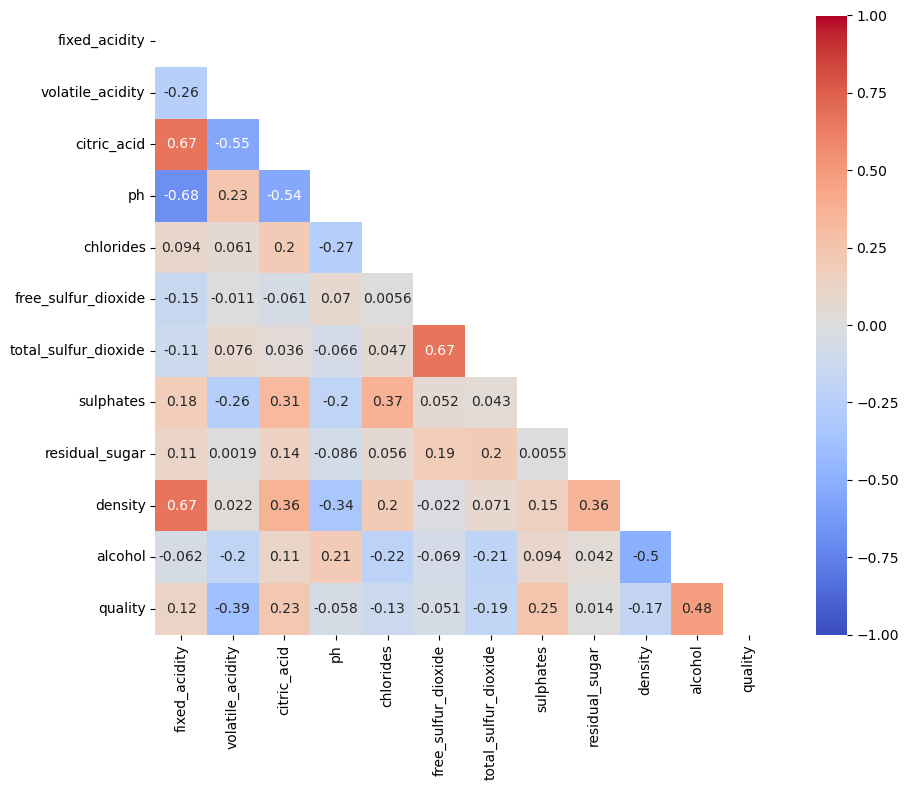

In [838]:
f, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(np.ones_like(corr_r, dtype=bool))

sns.heatmap(corr_r, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)

plt.tight_layout()

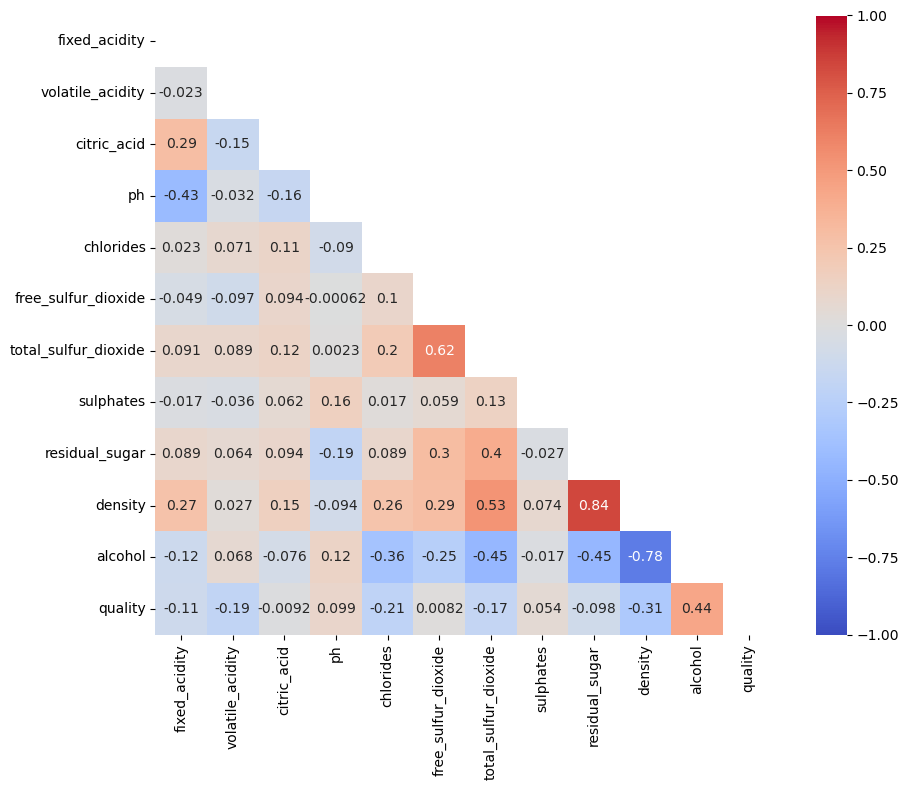

In [839]:
f, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(np.ones_like(corr_w, dtype=bool))

sns.heatmap(corr_w, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)

plt.tight_layout()

C:\Users\olive\AppData\Local\Temp\ipykernel_25500\1364656078.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


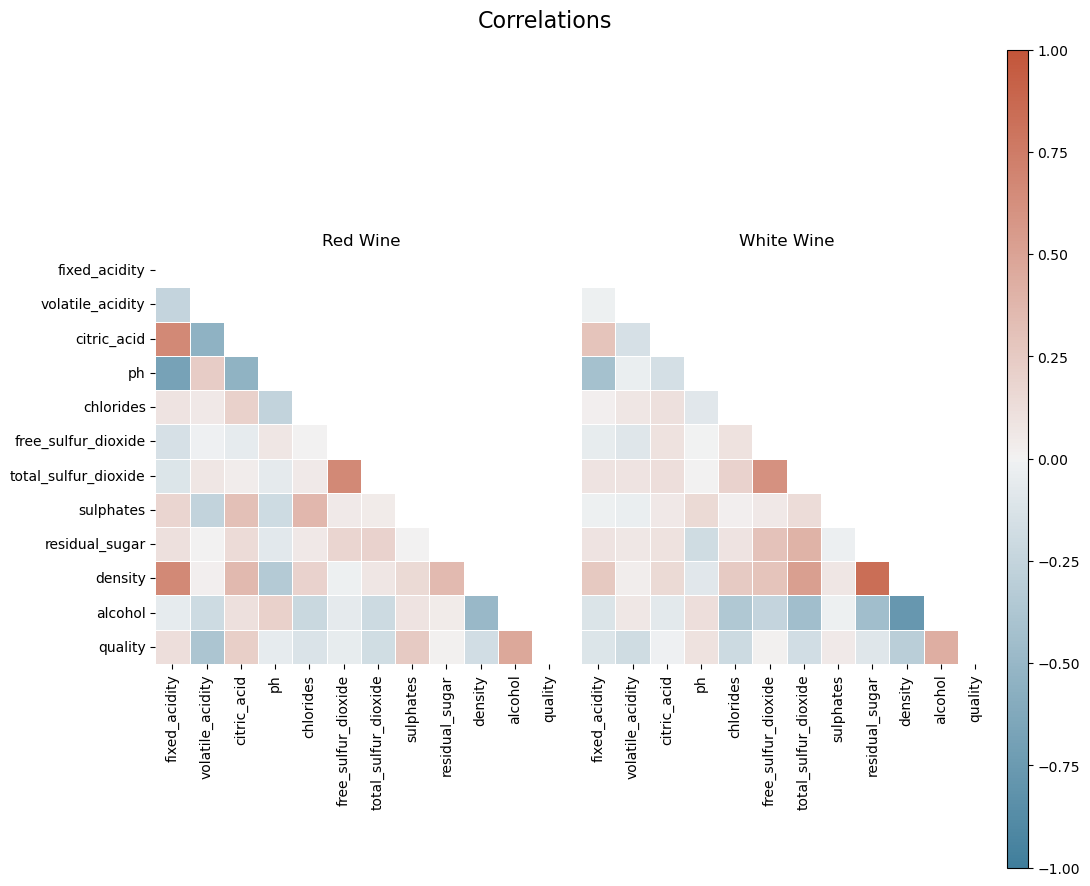

In [840]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_r, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(1, 3, figsize=(11, 9), gridspec_kw={"width_ratios":[1, 1, 0.05]})#,  sharex=True, sharey=True) # gridspec_kw={"width_ratios":[1, 1, 0.05]},
# ax = ax.flatten()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
cplot_wine_r = sns.heatmap(corr_r, mask=mask, 
            cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            ax=ax[0],
            cbar=False
            )

cplot_wine_w = sns.heatmap(corr_w, mask=mask, 
            cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            ax=ax[1],
            cbar=False
            )

# settings red wine plot
ax[0].set_title('Red Wine')

# settings white wine plot
ax[1].set_title('White Wine')
ax[1].set_yticks([], labels=[])
plt.legend().remove()

# colorbar
# TODO - reduce height of colorbar
mappable = cplot_wine_r.get_children()[0] # TODO - what's the artist? what does this mean?
plt.colorbar(mappable, cax=ax[2], orientation = 'vertical')#, pad=0.2)

# # legend
# # Get all lines and labels from all axes
# handles = []
# labels = []
# for ax in fig.axes:
#     for h, l in zip(*ax.get_legend_handles_labels()):
#         handles.append(h)
#         labels.append(l)

# # Remove any existing legends from subplots
# for ax in fig.axes:
#     if ax.get_legend():
#         ax.get_legend().remove()

# # Create figure-level legend
# # fig.legend(handles, labels, loc='upper center', 
# #            bbox_to_anchor=(0.5, 1.1), ncol=2)

# fig
fig.suptitle('Correlations', fontsize=16)

plt.tight_layout()

### Observations from corr for red wines
- The input parameter correlation are pretty weak, except for 
  - fixed acidity and citric acid strong correlation
  - fixed acidity and density strong correlation
  - volatile acidity and sulphates
  - citric acid and pH
  - citric acid and sulphates
  - pH and chlorides
  - pH and density
  - pH and alcohol
  - chlorides and sulphates
  - chlorides and density
  - chlorides and alcohol
  - sulfur dioxides and residual sugar
    - total sulfur dioxide and alcohol
  - density and alcohol
- Quality correlations
  - strong
    - alcohol: positive
  - medium
    - volatile acidity; negative
    - citric acid; positive
    - total sulfur dioxide, but not free; negative 
    - sulphates; positive
    - density: negative
  - weak >0.1
    - chlorides 

### Observations from corr for white wines
- The input parameter correlation are pretty weak, except for 
  - the quantities that are somewhat related, e.g. pH and acidity, whereas there are exceptions!
  - fixed acidity and density
  - sulfur oxides and residual sugar / density
  - density and fixed acidity
  - density and chlorides
  - alcohol and chlorides
  - alcohol and sulfur oxides
  - alcohol and density / residual sugar
- Quality correlations are 
  - high for (abs>0.4)
    - alcohol (positive correlation)
    - density (negative correlation), surprisingly not for residual sugar
  - medium for  (~0.2<abs<0.4)
    - volatile acidity: negative
    - chlorides: negative
  - weak
    - fixed acidity: negative
    - pH: positive
    - total sulfur dioxide: negative
    - residual sugar: negative

### Differences red and white
- input parameters
  - fixed acidity and volatile acidity: strong in red, weak in white
  - volatile acidity and sulphates: strong in red, weak in white
  - volatile acidity and alcohol: strong, negative in red, weak, positive in white
  - 

Questions on data set
- density and residual sugar correlate differently with the other quantities. Why? what does that mean? 
- What do the correlations between the input quantities mean?
- What is the meaning of sulphates in red wine?
- sulphates seem to be beneficial in red wines. 

### quality correlations

In [841]:
# TODO quality is a discrete variable; how to calculate the correlation coefficient?
import scipy.stats as stats
stats.pointbiserialr(wine_r['quality'], wine_r['alcohol'])

SignificanceResult(statistic=np.float64(0.47616632400113595), pvalue=np.float64(2.8314769747761665e-91))

## Plot Configuration

In [842]:
# plot configs
# TODO - how to transfer the config efficiently to the figures? 

# first, try a dictionary
wine_type_colors = {'red_wine':'red', 'white_wine':'gray'}
quality_label_colors = {'low':'o', 'medium':'g', 'high':'b'}

# second, try a class! Could be easier

# define variables; problem: in the end I will have many many variables in the space that I do not understand anymore
color_red = 'red'
color_white = 'gray'

## Quantities

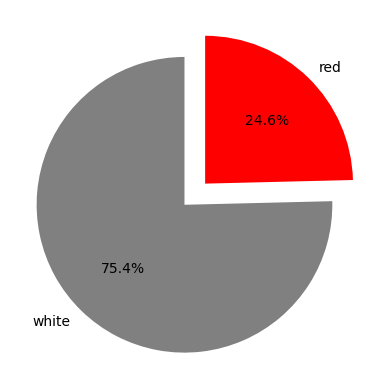

In [843]:
wine_types_count = wine.color.value_counts()

fig, ax = plt.subplots()
ax.pie(
    wine_types_count.values, labels=wine_types_count.index, 
    colors=[wine_type_colors['white_wine'], wine_type_colors['red_wine']],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.1, 0.1)#, 0, 1), (0.1, 0.1, 0, 1)]
    );

# Wine Quality

## Quality distribution

c:\Users\olive\anaconda3\envs\base_data_analysis\Lib\site-packages\numpy\ma\core.py:3463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  _data[indx] = dval
c:\Users\olive\anaconda3\envs\base_data_analysis\Lib\site-packages\numpy\ma\core.py:3463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  _data[indx] = dval


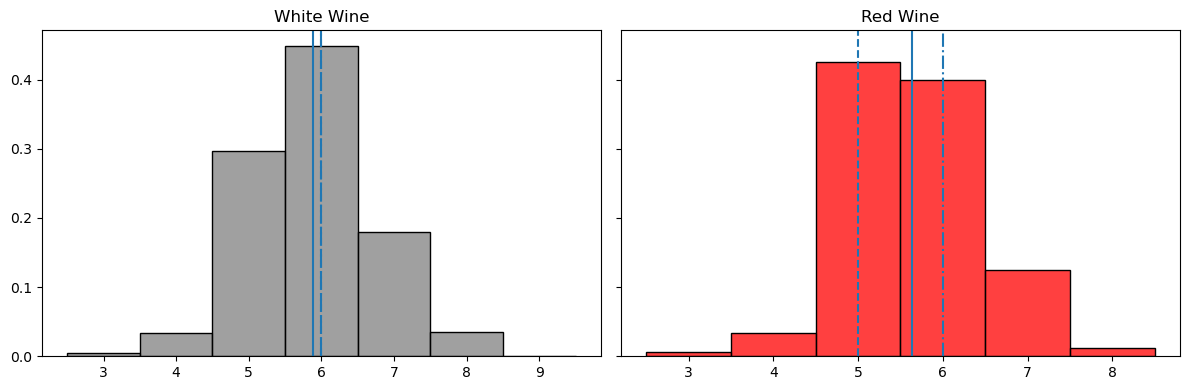

In [844]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), sharey=True)

# NOTE draw bars in the middle of the value without gaps -> discrete=True
# NOTE kde does not make sense here, does it?
sns.histplot(wine_w.quality, ax=ax[0], color=color_white, discrete=True, stat='density') #, kde=True)
sns.histplot(wine_r.quality, ax=ax[1], color=color_red, discrete=True, stat='density') #, kde=True)

ax[0].set_title('White Wine')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

ax[1].set_title('Red Wine')
ax[1].set_xlabel('')

# show average, median and mode
ylim = ax[0].get_ylim() # TODO find a way to skip this workaround
ax[0].vlines(
    [wine_w.quality.mean(), wine_w.quality.median(), wine_w.quality.mode()],
    ymin=ax[0].get_ylim()[0],
    ymax=ax[0].get_ylim()[1],
    linestyles=['solid', '-.', '--']
)
ax[0].set_ylim(ylim)

ylim=ax[1].get_ylim()
ax[1].vlines(
    [wine_r.quality.mean(), wine_r.quality.median(), wine_r.quality.mode()],
    ymin=ax[1].get_ylim()[0],
    ymax=ax[1].get_ylim()[1],
    linestyles=['solid', '-.', '--']
)
ax[1].set_ylim(ylim)

plt.tight_layout()

In [845]:
ax[0].get_ylim

<bound method _AxesBase.get_ylim of <Axes: title={'center': 'White Wine'}>>

#### White Wine Quality Distribution
  - avg: 5.8. avg=median, mode: 6
  - slighty negatively skewed, almost symmetric distribution
  - conclusion
    - Kind of normally distributed data set
    - sample: average wine years, wines meet the expectations, maybe slightly more bad wines
    - tasters: testing might not be symmetric
    - good representation of sample and testers

#### Red Wine Quality Distribution
  - avg: 5.6, median: 6, mode: 5
  - more shifted to lower ratings
  - skew unclear: positively skewed?
  - conclusions
    - Kind of normally distributed data set
    - sample: wine could be from relatively bad years
    - tasters: testing might not be symmetric
    - good representation of sample and testers

## Quality Label distribution

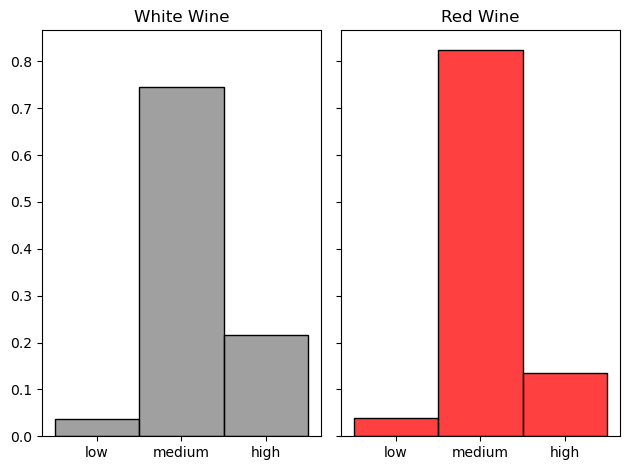

In [846]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)

sns.histplot(wine_w.quality_label, ax=ax[0], color=color_white, stat="density") # NOTE stat = density for normalization
sns.histplot(wine_r.quality_label, ax=ax[1], color=color_red, stat="density")

ax[0].set_title('White Wine')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

ax[1].set_title('Red Wine')
ax[1].set_xlabel('')

plt.tight_layout()

In [847]:
wine_r.quality_label.value_counts()

quality_label
medium    1319
high       217
low         63
Name: count, dtype: int64

In [848]:
wine_w.quality_label.value_counts()

quality_label
medium    3655
high      1060
low        183
Name: count, dtype: int64

Questions: 
- move the quality label?
- create a new quality label based on the high quality wines? 

Follow-Up Tasks
- Investigate high quality wines for similarities in chemical composition. Is there a composition that convinced the testers the most?
-  

## Alcohol vs. Wine Quality

### Quality Rating

<Axes: xlabel='quality', ylabel='alcohol'>

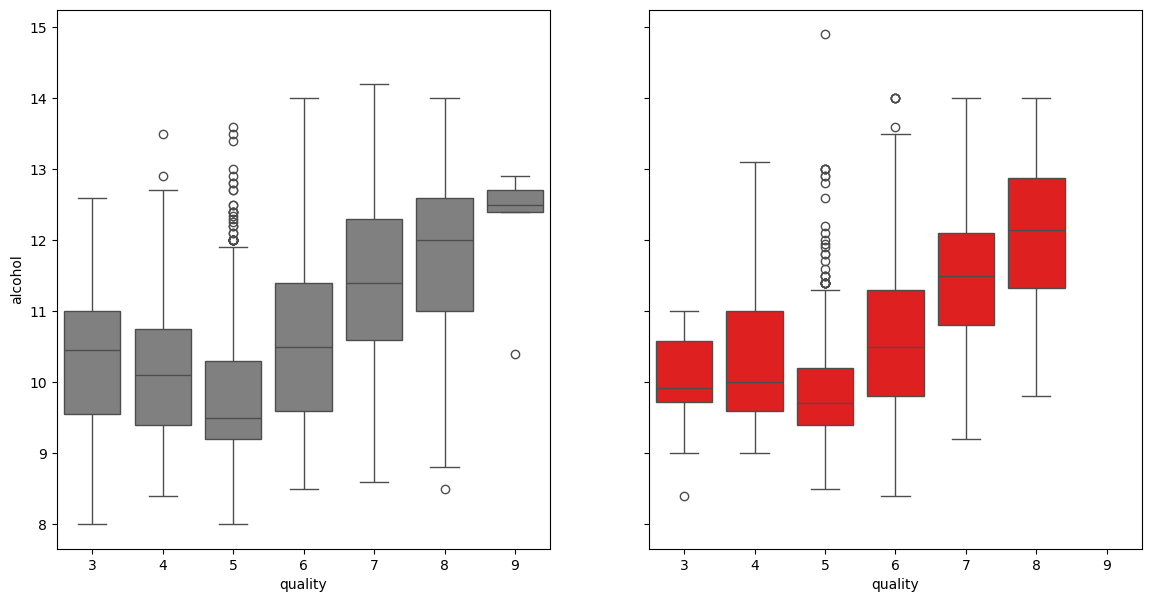

In [731]:
fig, ax = plt.subplots(1, 2, figsize=(14,7), sharex=True, sharey=True)

sns.boxplot(wine_w, y='alcohol', x='quality', ax=ax[0], color=wine_type_colors['white_wine'])
sns.boxplot(wine_r, y='alcohol', x='quality', ax=ax[1], color=wine_type_colors['red_wine'])

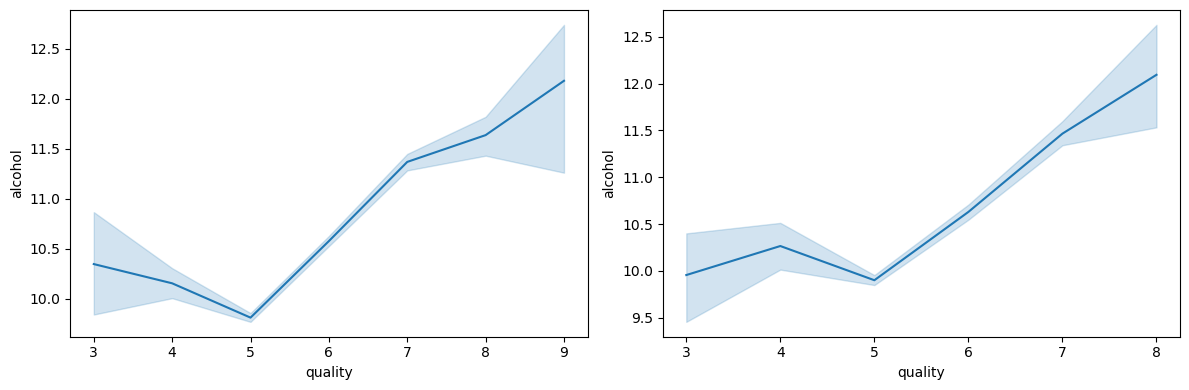

In [736]:
# TODO plot the averages and std
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.lineplot(x=wine_w.quality, y=wine_w.alcohol, ax=ax[0])
sns.lineplot(wine_r, x='quality', y='alcohol', ax=ax[1])

plt.tight_layout()

- Alcohol content is an indicator of good wine, however it's not decisive, because low quality wines also have a high alcohol content
- Alcohol, Alcohol and Residual Sugar are indicators of the fermentation process.
- Usually 50% of the input sugar can be turned into alcohol before fermentation stops.

#### Questions
- Is there a reason for this distribution?

#### Tasks
- Investigate the increase from rating of 5; cut out the bad wines, to find out a what's a good wine.

### Quality Labels

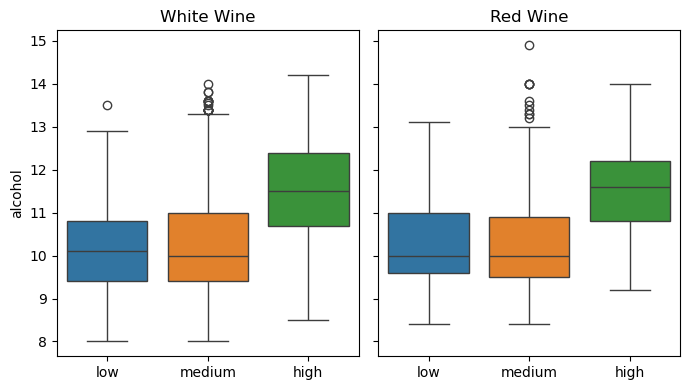

In [661]:
fig, ax = plt.subplots(1, 2, figsize=(7,4), sharex=True, sharey=True)
ax = ax.flatten()

# sns.boxplot(wine_r, x='quality', y='alcohol', ax=ax[0])
# sns.boxplot(wine_w, x='quality', y='alcohol', ax=ax[1])
sns.boxplot(wine_w, x='quality_label', y='alcohol', hue='quality_label', ax=ax[0])
sns.boxplot(wine_r, x='quality_label', y='alcohol', hue='quality_label', ax=ax[1])

ax[0].set_title('White Wine')
ax[0].set_xlabel('')

ax[1].set_title('Red Wine')
ax[1].set_xlabel('')

plt.tight_layout()

### ANOVA Tests

In [858]:
# test if ANOVA assumptions are met
print(pg.normality(wine_w, dv='alcohol', group='quality_label'))
print()
print(wine_w.groupby('quality_label').alcohol.var())

                      W          pval  normal
quality_label                                
medium         0.944380  4.550947e-35   False
high           0.970139  5.907996e-14   False
low            0.969698  5.211732e-04   False

quality_label
low       1.055901
medium    1.218894
high      1.575551
Name: alcohol, dtype: float64


C:\Users\olive\AppData\Local\Temp\ipykernel_25500\204133251.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(wine_w.groupby('quality_label').alcohol.var())


In [ ]:
# use Welch ANOVA
pg.welch_anova(wine_w, dv='alcohol', between='quality_label')

,Source,ddof1,ddof2,F,p-unc,np2
0,quality_label,2,470.61991,368.209463,5.574938e-97,0.148544


In [ ]:
# for comparison: ANOVA TEST on quality label and alcohol content
f, p = stats.f_oneway(
    wine_w.loc[wine_w.quality_label=='low', 'alcohol'],
    wine_w.loc[wine_w.quality_label=='medium', 'alcohol'],
    wine_w.loc[wine_w.quality_label=='high', 'alcohol']
)

print(f, p)

426.98903129663586 1.1792460124785171e-171


- High quality wines tend to have a higher alcohol content.
- The range is however very large.
- Although there is a strong, positive correlation between quality alcohol, the outliers show that this is not a good measure for quality
- medium quality wines have a low alcohol content, but there are many outliers with a very high alcohol content in this group.

Questions
- What are the features of medium quality wines?
- How do wines get a high alcohol content?
  - sugar is turned into alcohol
  - residual sugar -> sweetness
  - What about density?
  - acidity

## Density vs. Wine Quality 

<Axes: xlabel='quality', ylabel='density'>

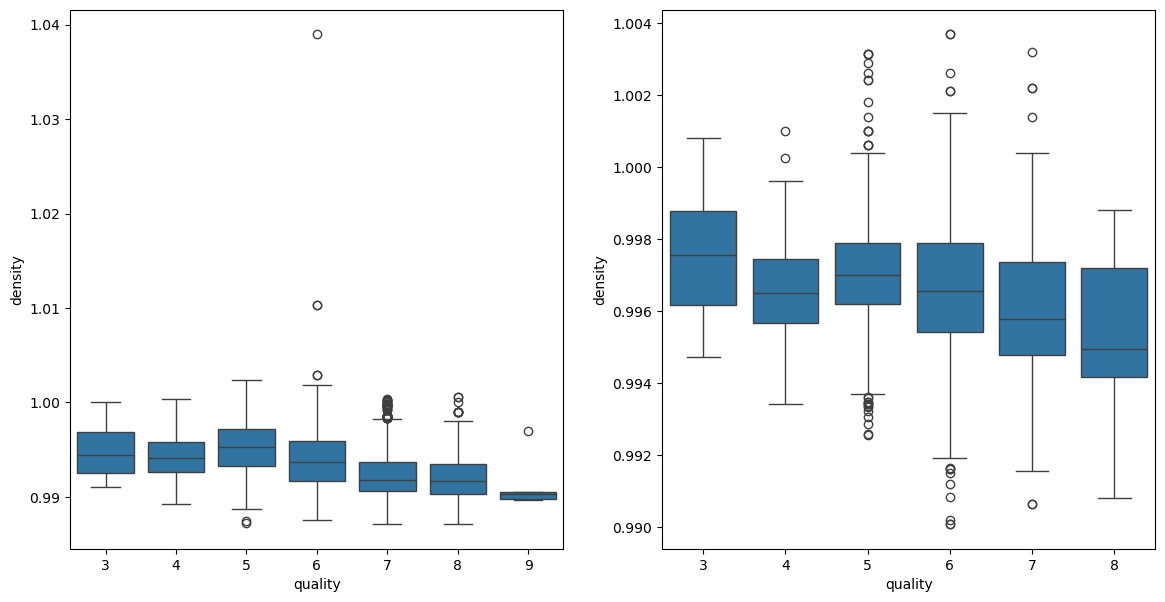

In [745]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.boxplot(wine_w, x='quality', y='density', ax=ax[0])
sns.boxplot(wine_r, x='quality', y='density', ax=ax[1])



# new_ylim = [ax[1].get_ylim()[0], ax[0].get_ylim()[1]]
# ax[0].set_ylim(new_ylim)
# ax[1].set_ylim(new_ylim)

In [663]:
wine_w.loc[wine_w.density.sort_values(ascending=False).index, :].head()

,color,fixed_acidity,volatile_acidity,citric_acid,ph,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality,quality_label
2781,white,7.8,0.965,0.60,3.39,0.074,8.0,160.0,0.69,65.80,1.03898,11.7,6,medium
1653,white,7.9,0.330,0.28,3.15,0.053,35.0,176.0,0.38,31.60,1.01030,8.8,6,medium
1663,white,7.9,0.330,0.28,3.15,0.053,35.0,176.0,0.38,31.60,1.01030,8.8,6,medium
3619,white,6.8,0.450,0.28,3.06,0.031,27.0,122.0,0.42,26.05,1.00295,10.6,6,medium
3623,white,6.8,0.450,0.28,3.06,0.031,27.0,122.0,0.42,26.05,1.00295,10.6,6,medium


Question:
- What is wine density? 

## Residual Sugar vs. Wine Quality 

<Axes: xlabel='quality', ylabel='residual_sugar'>

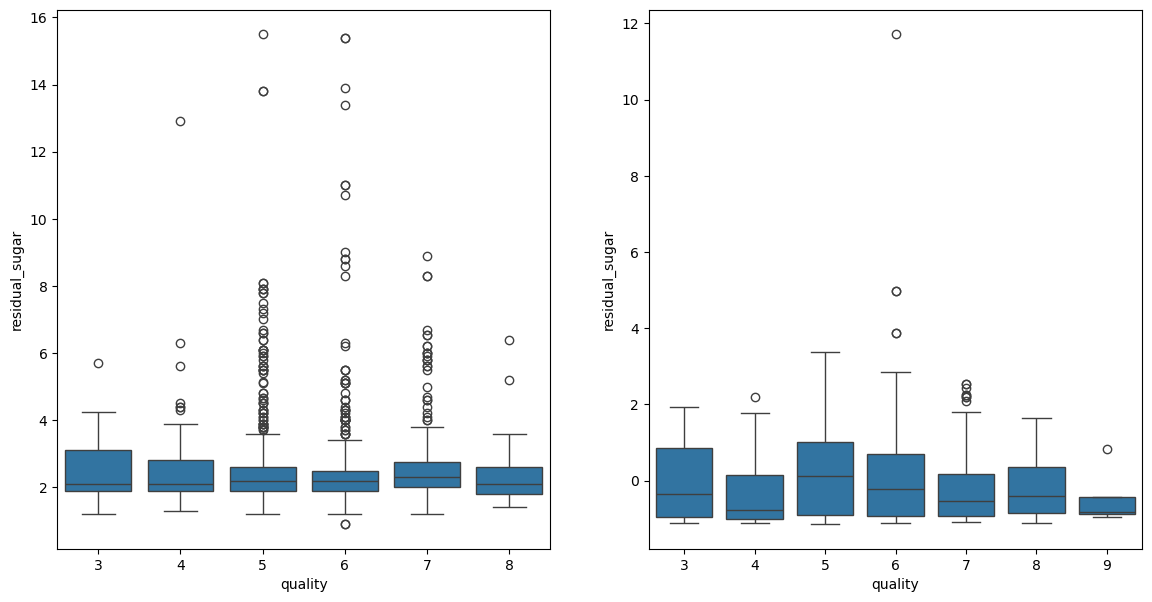

In [706]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.boxplot(wine_r, y='residual_sugar', x='quality', ax=ax[0])
sns.boxplot(wine_w, y='residual_sugar', x='quality', ax=ax[1])

## Sulphates vs. Wine Quality

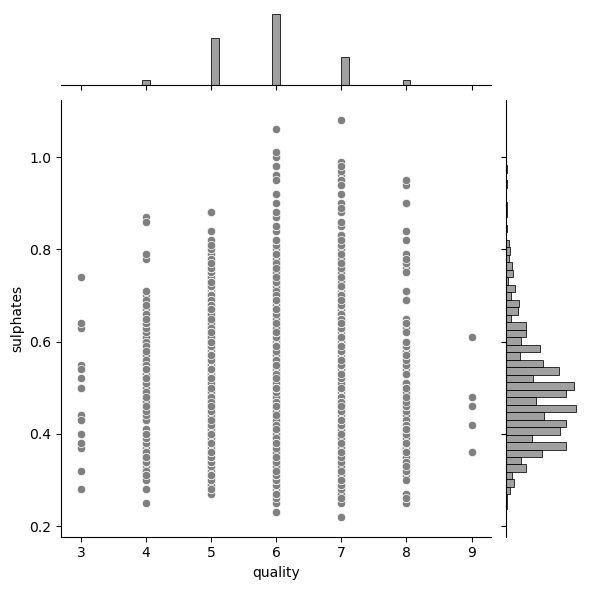

In [665]:
# fig, ax = plt.subplots(1, 2)

jg = sns.jointplot(data=wine_w, x="quality", y="sulphates", color=wine_type_colors['white_wine'])

# plt.tight_layout()

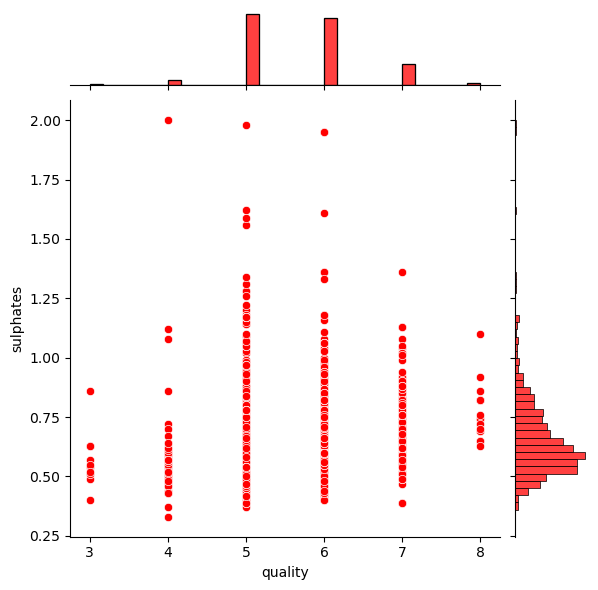

In [666]:
sns.jointplot(data=wine_r, x="quality", y="sulphates", color=wine_type_colors['red_wine'])

## High Quality Wines

In [667]:
wine_w_hq = wine_w[wine_w.quality_label == 'high']

In [668]:
# TODO What does this mean? Does this make sense? 

corr_wine_w_hq = wine_w_hq.corr(numeric_only=True)
corr_wine_w_hq

,fixed_acidity,volatile_acidity,citric_acid,ph,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
fixed_acidity,1.000000,-0.099616,0.254036,-0.485413,0.169356,0.001356,0.189370,-0.097483,0.249951,0.437434,-0.305784,-0.015515
volatile_acidity,-0.099616,1.000000,-0.235650,0.051315,-0.287006,-0.167781,-0.100073,-0.049960,-0.042728,-0.295067,0.507915,0.062351
citric_acid,0.254036,-0.235650,1.000000,-0.086478,0.105401,0.127347,0.105843,-0.026035,0.042357,0.128490,-0.124357,0.020389
ph,-0.485413,0.051315,-0.086478,1.000000,-0.113336,0.019968,-0.036396,0.201263,-0.349661,-0.188604,0.127937,0.023764
chlorides,0.169356,-0.287006,0.105401,-0.113336,1.000000,0.178418,0.383980,0.031800,0.282930,0.494108,-0.543673,-0.017437
free_sulfur_dioxide,0.001356,-0.167781,0.127347,0.019968,0.178418,1.000000,0.546875,0.162011,0.119518,0.175818,-0.188198,0.064282
total_sulfur_dioxide,0.189370,-0.100073,0.105843,-0.036396,0.383980,0.546875,1.000000,0.007509,0.444418,0.562270,-0.449752,0.005052
sulphates,-0.097483,-0.049960,-0.026035,0.201263,0.031800,0.162011,0.007509,1.000000,-0.133517,0.018288,-0.043666,-0.050268
residual_sugar,0.249951,-0.042728,0.042357,-0.349661,0.282930,0.119518,0.444418,-0.133517,1.000000,0.820208,-0.483921,0.033866
density,0.437434,-0.295067,0.128490,-0.188604,0.494108,0.175818,0.562270,0.018288,0.820208,1.000000,-0.843614,-0.035050


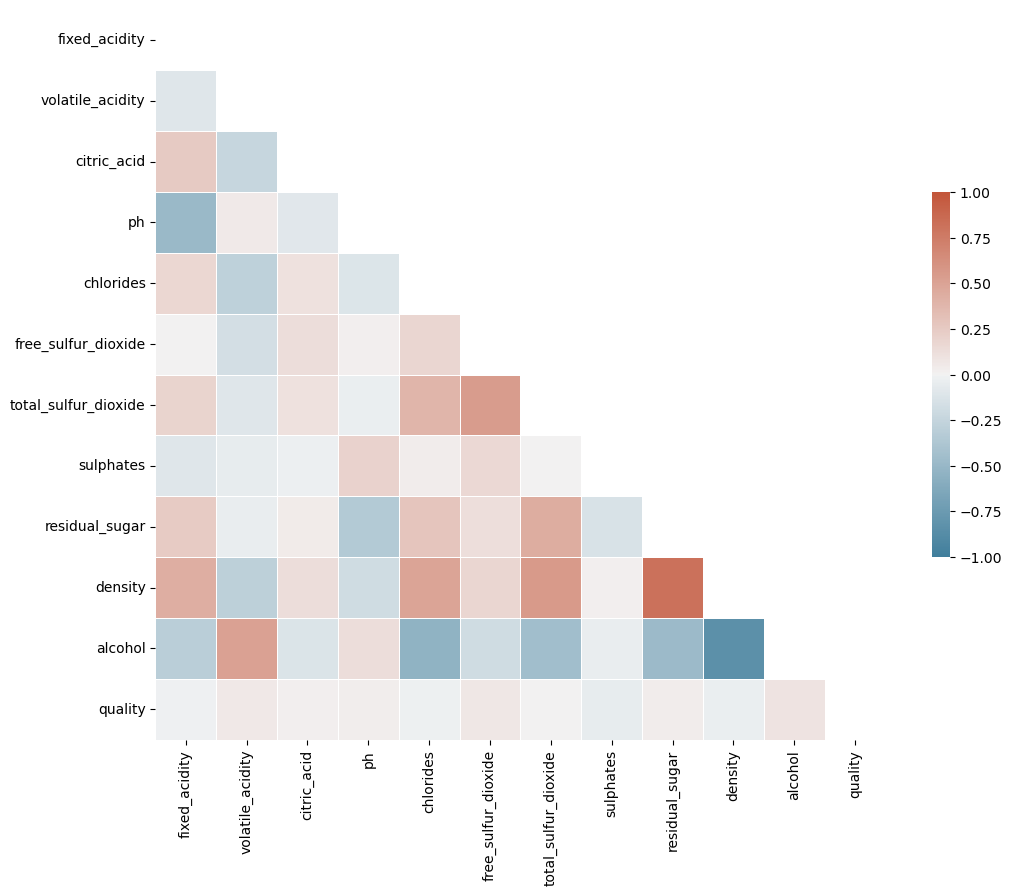

In [669]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_wine_w_hq, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))#,  sharex=True, sharey=True) # gridspec_kw={"width_ratios":[1, 1, 0.05]},
# ax = ax.flatten()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

cplot_wine_w = sns.heatmap(corr_wine_w_hq, mask=mask, 
            cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            cbar=True
            )

plt.tight_layout()

Very low quality correlations! So, from the inputs one cannot really say if a wine is high quality. 

# Inputs

## Citric Acid

<Axes: xlabel='citric_acid', ylabel='Count'>

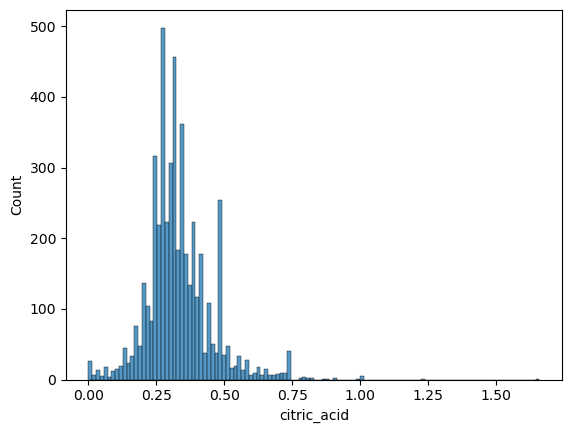

In [670]:
sns.histplot(wine_w, x='citric_acid')

<Axes: ylabel='citric_acid'>

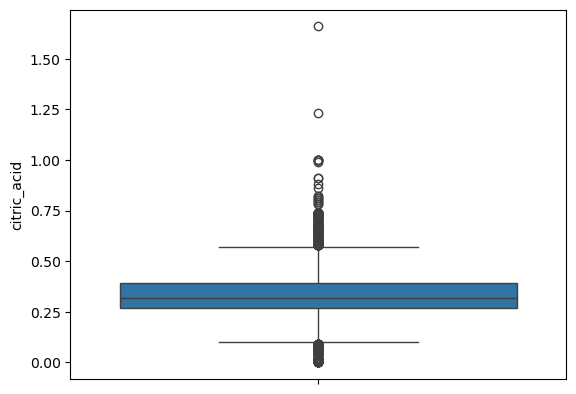

In [671]:
sns.boxplot(wine_w, y='citric_acid', orient='vertical')

## Density

<Axes: xlabel='density', ylabel='Density'>

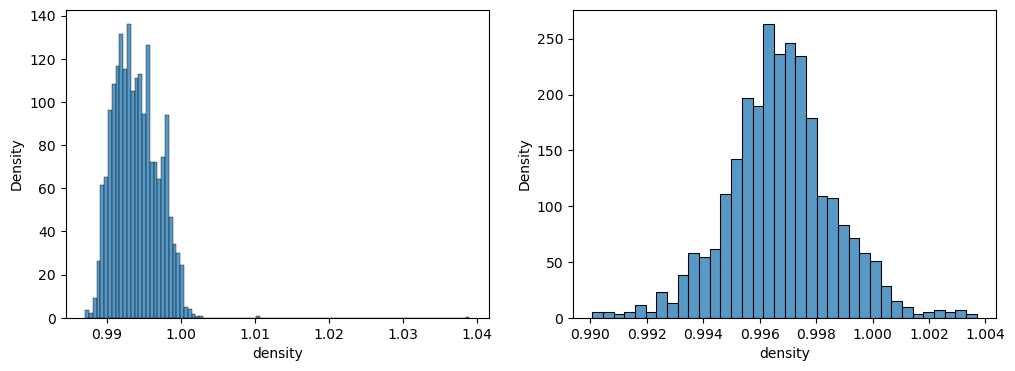

In [672]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

# TODO Why is the plot not normalized?
sns.histplot(x=wine_w.density, stat='density', ax=ax[0])
sns.histplot(x=wine_r.density, stat='density', ax=ax[1])

### Density Outlier

In [673]:
high_density_wines_w = wine_w.loc[wine_w.density.sort_values(ascending=False).index, :].head(10)
high_density_wines_w

,color,fixed_acidity,volatile_acidity,citric_acid,ph,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality,quality_label
2781,white,7.8,0.965,0.60,3.39,0.074,8.0,160.0,0.69,65.80,1.03898,11.7,6,medium
1653,white,7.9,0.330,0.28,3.15,0.053,35.0,176.0,0.38,31.60,1.01030,8.8,6,medium
1663,white,7.9,0.330,0.28,3.15,0.053,35.0,176.0,0.38,31.60,1.01030,8.8,6,medium
3619,white,6.8,0.450,0.28,3.06,0.031,27.0,122.0,0.42,26.05,1.00295,10.6,6,medium
3623,white,6.8,0.450,0.28,3.06,0.031,27.0,122.0,0.42,26.05,1.00295,10.6,6,medium
2334,white,7.5,0.230,0.35,3.44,0.058,128.0,212.0,0.43,17.80,1.00241,8.9,5,medium
1608,white,6.9,0.270,0.49,2.98,0.057,59.0,235.0,0.47,23.50,1.00240,8.6,5,medium
3420,white,7.6,0.280,0.49,3.01,0.060,30.0,145.0,0.44,20.15,1.00196,8.5,5,medium
2250,white,9.2,0.340,0.54,3.08,0.060,46.0,235.0,0.61,17.30,1.00182,8.8,6,medium
1958,white,7.4,0.320,0.55,2.96,0.056,53.0,238.0,0.58,16.60,1.00170,8.7,6,medium


In [674]:
wine_w.columns

Index(['color', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'ph',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'sulphates',
       'residual_sugar', 'density', 'alcohol', 'quality', 'quality_label'],
      dtype='object')

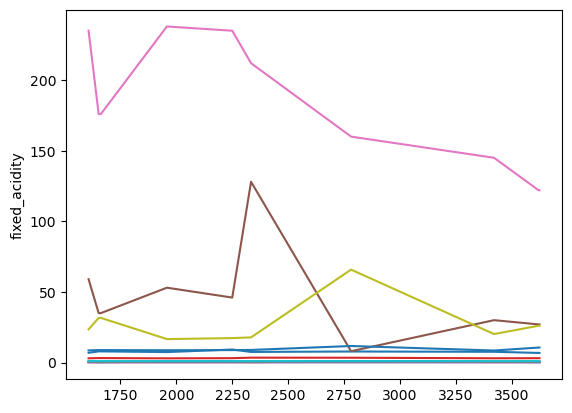

In [675]:
all_inputs = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'ph',
              'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'sulphates',
              'residual_sugar', 'density', 'alcohol'
              ]

for input in all_inputs:
    sns.lineplot(high_density_wines_w[input])

## Residual Sugar

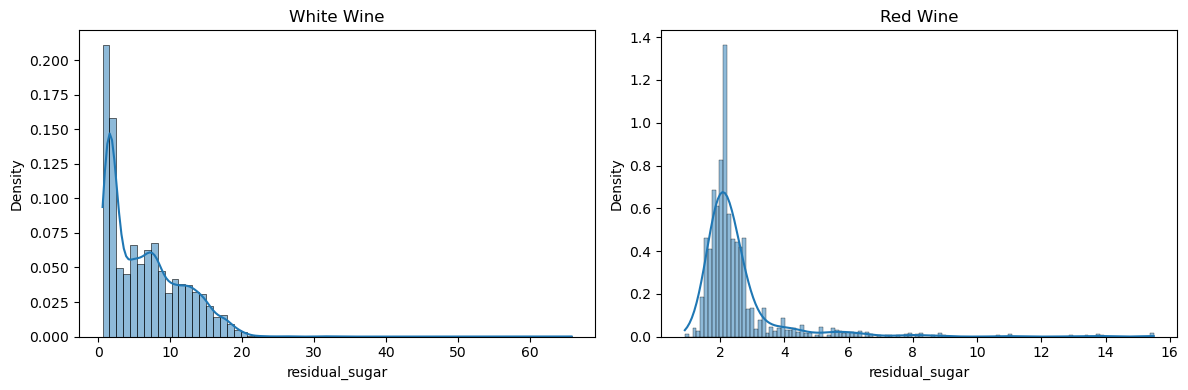

In [676]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(wine_w, x='residual_sugar', stat='density', kde=True, ax=ax[0])
sns.histplot(wine_r, x='residual_sugar', stat='density', kde=True, ax=ax[1])

ax[0].set_title('White Wine')

ax[1].set_title('Red Wine')

plt.tight_layout()

- The distribution of Residual Sugar is wider in white wines; the distribution is quite narrow in red wines.
- Red wines have a maximum around 2

## Density vs. Sulphates

<Axes: xlabel='sulphates', ylabel='density'>

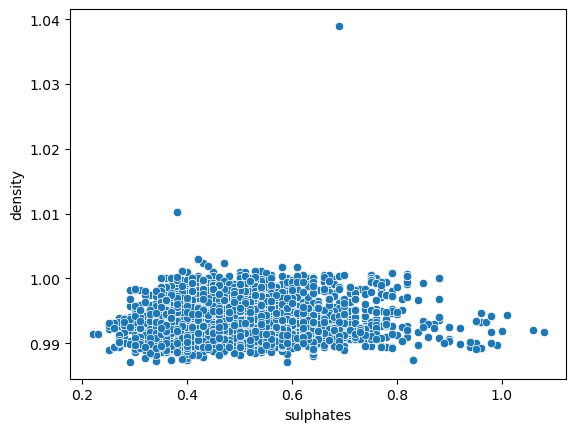

In [677]:
sns.scatterplot(wine_w, y='density', x='sulphates')

## Density vs. Residual Sugar

(0.99, 1.005)

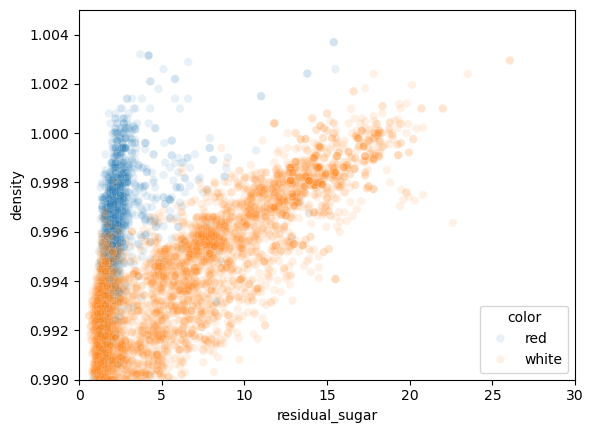

In [678]:
ax = sns.scatterplot(wine, y='density', x='residual_sugar', 
                     hue='color', alpha=0.1
                     )

ax.set_xlim([0, 30])
ax.set_ylim([0.99, 1.005])

(0.98, 1.005)

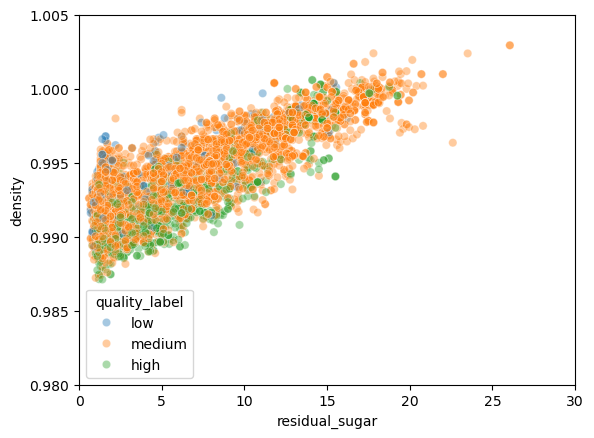

In [679]:
ax = sns.scatterplot(wine_w, y='density', x='residual_sugar', hue='quality_label', alpha=0.4)

ax.set_xlim([0, 30])
ax.set_ylim([0.98, 1.005])

<Axes: xlabel='total_sulfur_dioxide', ylabel='density'>

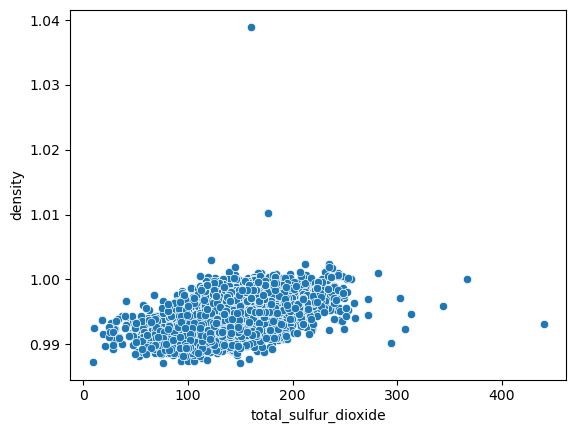

In [680]:
sns.scatterplot(wine_w, y='density', x='total_sulfur_dioxide')

<Axes: xlabel='total_sulfur_dioxide', ylabel='residual_sugar'>

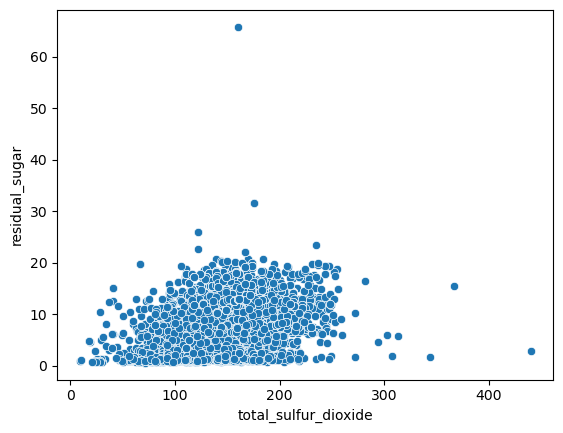

In [681]:
sns.scatterplot(wine_w, y='residual_sugar', x='total_sulfur_dioxide')

# Questions

## On the data set 
- Who rated the wines? wine experts graded the wine quality between 0 (very bad) and 10 (excellent)
- Measurement accuracy? 

## Data exploration
- Box Plots for all columns: how do red and white wine compare?
- Correlation plots: See 

## For data analysis
- How strong is the correlation between ...
  - density and residual sugar? expectation: strong
- What's a quality wine? How do the quantities relate:
  - quality and residual sugar? expectation: strong
  - Sulphates and quality? hypthesis: additives lower the quality 
  - Volatile acidity and quality? hypthesis: additives lower the quality 
- Wines with low ph and high citric and fixed acidity should have high concentrations of other acids not measured here 

# Ideas

Build a classification machine to determine 
- if red or white wine
- if good quality can be achieved